# Some other features in Bayesian inference

| | | |
|-|-|-|
|[ ![Creative Commons License](images/cc4.png)](http://creativecommons.org/licenses/by-nc/4.0/) |[ ![aGrUM](images/logoAgrum.png)](https://agrum.org) |[ ![interactive online version](images/atbinder.svg)](https://agrum.gitlab.io/extra/agrum_at_binder.html)

Lazy Propagation uses a secondary structure called the "Junction Tree" to perform the inference.

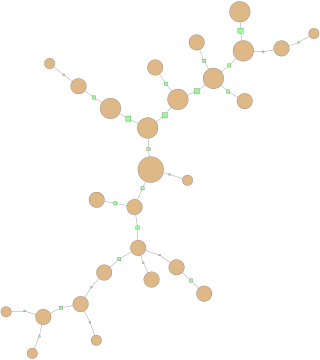

In [1]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

bn=gum.loadBN("res/alarm.dsl")
gnb.showJunctionTreeMap(bn);

But this junction tree can be transformed to build different probabilistic queries.

In [2]:
bn=gum.fastBN("A->B->C->D;A->E->D;F->B;C->H")
ie=gum.LazyPropagation(bn)
bn              

(pyAgrum.BayesNet<double>@000002139B675A10) BN{nodes: 7, arcs: 7, domainSize: 128, dim: 16, mem: 256o}

## Evidence impact 
Evidence Impact allows the user to analyze the effect of any variables on any other variables

In [3]:
ie.evidenceImpact("B",["A","H"])

(pyAgrum.Potential<double>@000002139B7A79D0) 
             ||  B                |
H     |A     ||0        |1        |
------|------||---------|---------|
0     |0     || 0.4631  | 0.5369  |
1     |0     || 0.5761  | 0.4239  |
0     |1     || 0.3879  | 0.6121  |
1     |1     || 0.4996  | 0.5004  |

Evidence impact is able to find the minimum set of variables which effectively conditions the analyzed variable

In [4]:
ie.evidenceImpact("E",["A","F","B","D"]) # {A,D,B} d-separates E and F

(pyAgrum.Potential<double>@000002139B7A7230) 
                    ||  E                |
D     |B     |A     ||0        |1        |
------|------|------||---------|---------|
0     |0     |0     || 0.1907  | 0.8093  |
1     |0     |0     || 0.3157  | 0.6843  |
0     |1     |0     || 0.1025  | 0.8975  |
1     |1     |0     || 0.4230  | 0.5770  |
0     |0     |1     || 0.2897  | 0.7103  |
1     |0     |1     || 0.4440  | 0.5560  |
0     |1     |1     || 0.1651  | 0.8349  |
1     |1     |1     || 0.5592  | 0.4408  |

In [5]:
ie.evidenceImpact("E",["A","B","C","D","F"]) # {A,C,D} d-separates E and {B,F}

(pyAgrum.Potential<double>@000002139B7A77D0) 
                    ||  E                |
D     |A     |C     ||0        |1        |
------|------|------||---------|---------|
0     |0     |0     || 0.3251  | 0.6749  |
1     |0     |0     || 0.0133  | 0.9867  |
0     |1     |0     || 0.4546  | 0.5454  |
1     |1     |0     || 0.0229  | 0.9771  |
0     |0     |1     || 0.0633  | 0.9367  |
1     |0     |1     || 0.4591  | 0.5409  |
0     |1     |1     || 0.1047  | 0.8953  |
1     |1     |1     || 0.5950  | 0.4050  |

## Evidence Joint Imapct

In [6]:
ie.evidenceJointImpact(["A","F"],["B","C","D","E","H"]) # {B,E} d-separates [A,F] and [C,D,H]

(pyAgrum.Potential<double>@000002139B7A72B0) 
                    ||  A                |
F     |B     |E     ||0        |1        |
------|------|------||---------|---------|
0     |0     |0     || 0.0977  | 0.3931  |
1     |0     |0     || 0.0170  | 0.4922  |
0     |1     |0     || 0.0173  | 0.5420  |
1     |1     |0     || 0.0696  | 0.3711  |
0     |0     |1     || 0.1561  | 0.3627  |
1     |0     |1     || 0.0272  | 0.4541  |
0     |1     |1     || 0.0282  | 0.5096  |
1     |1     |1     || 0.1133  | 0.3489  |